# Movie Reccomender System

## Business Understanding

## Data Understanding

For this project, we will be using four datasets

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# setting the font size for all plots
font = {'size': 16}

plt.rc('font', **font)


### Reading the data

In [2]:
# Loading the datasets from the data folder
links_df = pd.read_csv('data/links.csv')
movies_df = pd.read_csv('data/movies.csv')
ratings_df = pd.read_csv('data/ratings.csv')
tags_df = pd.read_csv('data/tags.csv')

### links_df

In [3]:
display(links_df.head())
links_df.info()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


The links dataframe contains a movieid and also its id in imdb and tmbd

### movies_df

In [4]:
display(movies_df.head())
movies_df.info()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


movies df contains the movie id and also it's title plus the genre a certain movie belongs to.
The are no null values present here

### ratings_df

In [5]:
display(ratings_df.head())
ratings_df.info()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


The rating df contains a user id, movie id and the ranking. Timestap here is irrelevant.

### tags_df

In [6]:
display(tags_df.head())
tags_df.info()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


The tags df contains the user id, movie id and also its tag.

In [7]:
# printing the number of records in every dataframe
dataframes = [links_df, movies_df, ratings_df, tags_df]
dataframe_names = ['links_df', 'movies_df', 'ratings_df', 'tags_df']

for i in range(len(dataframes)):
    print(f" {dataframe_names[i]} has {dataframes[i].shape[0]} records.")

 links_df has 9742 records.
 movies_df has 9742 records.
 ratings_df has 100836 records.
 tags_df has 3683 records.


tags_df has less values hence won't be appropriate to use it in this project. Also the same information present here is the same in the movie_df

## Data Cleaning

### movie_df
**the genres column**

for the genres column, I will change every value in every column to lower case and store them in a list

In [8]:
movies_df_cleaned = movies_df.copy()
movies_df_cleaned.genres = movies_df.genres.map(lambda x: x.replace('|', ',').lower().split(','))
movies_df_cleaned

,movieId,title,genres
0,1,Toy Story (1995),"[adventure, animation, children, comedy, fantasy]"
1,2,Jumanji (1995),"[adventure, children, fantasy]"
2,3,Grumpier Old Men (1995),"[comedy, romance]"
3,4,Waiting to Exhale (1995),"[comedy, drama, romance]"
4,5,Father of the Bride Part II (1995),[comedy]
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),"[action, animation, comedy, fantasy]"
9738,193583,No Game No Life: Zero (2017),"[animation, comedy, fantasy]"
9739,193585,Flint (2017),[drama]
9740,193587,Bungo Stray Dogs: Dead Apple (2018),"[action, animation]"


### ratings_df, tags_df

**Removing the timestamp columns in both dataframes**

In [9]:
ratings_df_cleaned = ratings_df.drop('timestamp', axis=1)
tags_df_cleaned = tags_df.drop('timestamp', axis=1)

display(ratings_df_cleaned.head(2))
tags_df_cleaned.head(2)

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0


,userId,movieId,tag
0,2,60756,funny
1,2,60756,Highly quotable


This dataset has a total of 20 movie genres.

## EDA - Explanatory Data Analysis

### Univariative Data Analysis

#### Movies made per year

In [10]:
# extracting years from the title column
movies_df_cleaned['year'] = movies_df_cleaned['title'].str.extract('.*\((.*)\).*',expand = False)
movies_df_cleaned.year.unique()

array(['1995', '1994', '1996', '1976', '1992', '1967', '1993', '1964',
       '1977', '1965', '1982', '1990', '1991', '1989', '1937', '1940',
       '1969', '1981', '1973', '1970', '1955', '1959', '1968', '1988',
       '1997', '1972', '1943', '1952', '1951', '1957', '1961', '1958',
       '1954', '1934', '1944', '1960', '1963', '1942', '1941', '1953',
       '1939', '1950', '1946', '1945', '1938', '1947', '1935', '1936',
       '1956', '1949', '1932', '1975', '1974', '1971', '1979', '1987',
       '1986', '1980', '1978', '1985', '1966', '1962', '1983', '1984',
       '1948', '1933', '1931', '1922', '1998', '1929', '1930', '1927',
       '1928', '1999', '2000', '1926', '1919', '1921', '1925', '1923',
       '2001', '2002', '2003', '1920', '1915', '1924', '2004', '1916',
       '1917', '2005', '2006', '1902', nan, '1903', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '1908', '2006–2007'], dtype=object)

There seems to be an off value ('2006--2007') and also a nan value

In [11]:
# checking record(s) that have 2006--2007 in the year column
movies_df_cleaned[movies_df_cleaned['year'] == "2006–2007"]

,movieId,title,genres,year
9518,171749,Death Note: Desu nôto (2006–2007),[(no genres listed)],2006–2007


In [12]:
# changing it to 2007
movies_df_cleaned.year = movies_df_cleaned.year.replace('2006–2007', '2007')
movies_df_cleaned[movies_df_cleaned['year'] == "2006–2007"]

,movieId,title,genres,year


In [13]:
# checking record(s) that contain null values in the year column
display(movies_df_cleaned[pd.isna(movies_df_cleaned.year)])
len(movies_df_cleaned[pd.isna(movies_df_cleaned.year)])

,movieId,title,genres,year
6059,40697,Babylon 5,[sci-fi],NaN
9031,140956,Ready Player One,"[action, sci-fi, thriller]",NaN
9091,143410,Hyena Road,[(no genres listed)],NaN
9138,147250,The Adventures of Sherlock Holmes and Doctor W...,[(no genres listed)],NaN
9179,149334,Nocturnal Animals,"[drama, thriller]",NaN
9259,156605,Paterson,[(no genres listed)],NaN
9367,162414,Moonlight,[drama],NaN
9448,167570,The OA,[(no genres listed)],NaN
9514,171495,Cosmos,[(no genres listed)],NaN
9515,171631,Maria Bamford: Old Baby,[(no genres listed)],NaN


12

In [14]:
# changing the data type of the year column to integer
movies_df_cleaned.year = movies_df_cleaned.year.dropna().astype(int)

# describing the cleaned movie datafram
movies_df_cleaned.year.describe()

count    9730.000000
mean     1994.614902
std        18.534692
min      1902.000000
25%      1988.000000
50%      1999.000000
75%      2008.000000
max      2018.000000
Name: year, dtype: float64

This dataset contains movie realeast between year 1902 and 2018

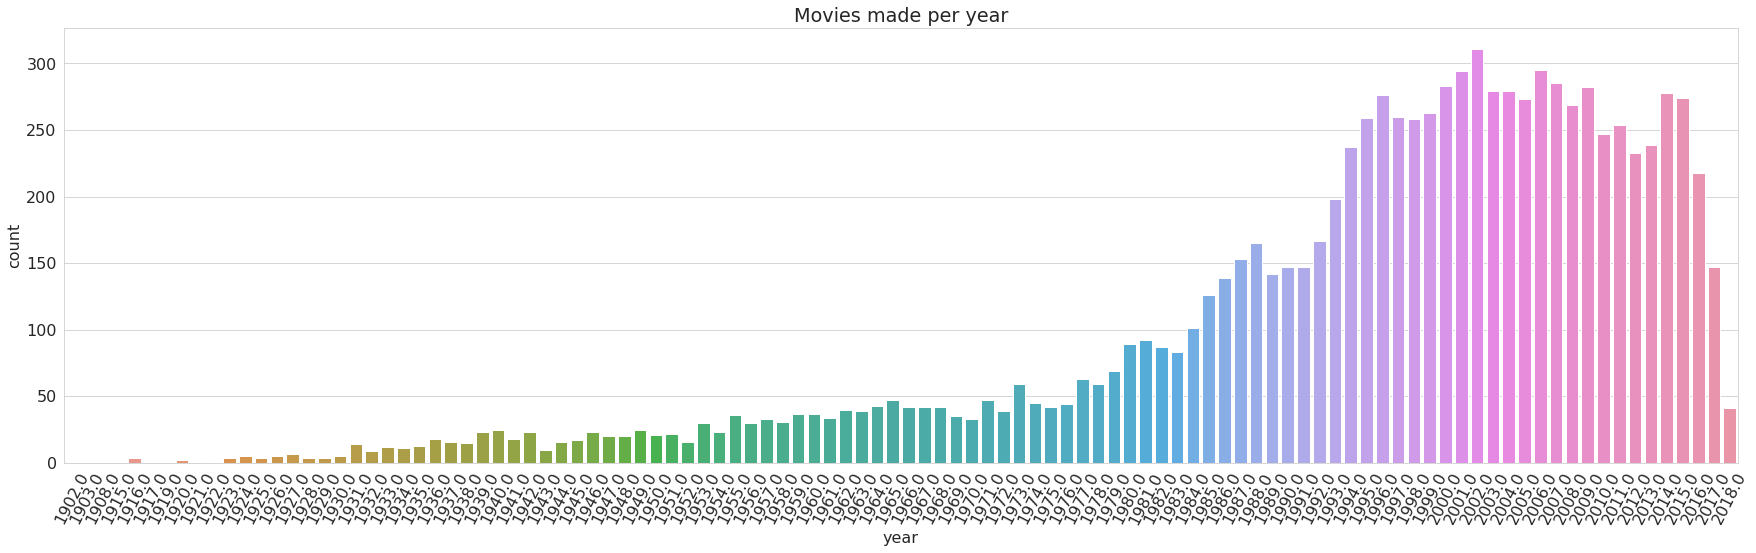

In [15]:
plt.figure(figsize=(30,8))
sns.countplot(x=movies_df_cleaned.year)
plt.xticks(rotation=63)
plt.title('Movies made per year')
plt.show()

#### Movies rating counts

In [16]:
ratings_df_cleaned['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

The ratings seem to range from 0 to 5

In [17]:
# investigating the range of ratings in the ratings df
ratings_df_cleaned['rating'].value_counts().to_frame()

,rating
4.0,26818
3.0,20047
5.0,13211
3.5,13136
4.5,8551
2.0,7551
2.5,5550
1.0,2811
1.5,1791
0.5,1370


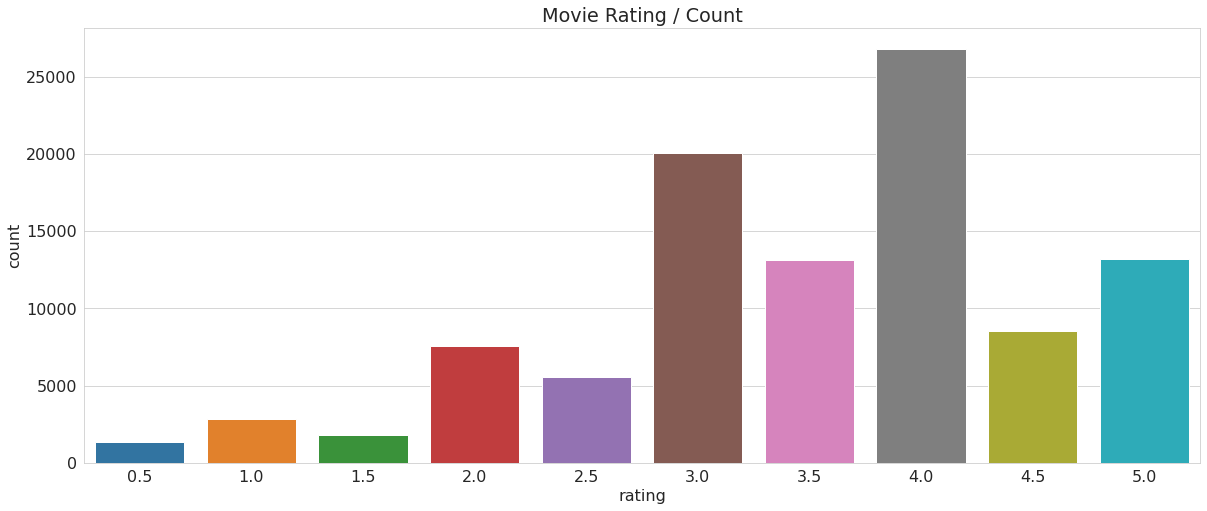

In [35]:
# Plotting a count plot of the ratings
plt.figure(figsize=(20,8))
sns.countplot(x=ratings_df['rating'])
plt.title('Movie Rating / Count');
plt.show()

It can be deduced that rating given by users approximately 3.0 - 4.0 is the most common rating in the dataset.

### Multivariate Data Analysis

### Genre average ratings

**Getting all the genres present in the dataset**

In [19]:
# creating a list to store the movie genres
genres = []

for record in range(len(movies_df_cleaned)):
    genres_list = movies_df_cleaned.loc[record, 'genres']

    for genre in genres_list:
        if genre not in genres:
            genres.append(genre)

In [20]:
movies_df_cleaned.loc[1, 'genres']

['adventure', 'children', 'fantasy']

In [21]:
movies_df_cleaned.loc[1, 'movieId']

2

In [22]:
r = ratings_df[ratings_df.movieId == 2]['rating'].mean()
r

3.4318181818181817

In [23]:
n = ratings_df[ratings_df.movieId == 2]['rating'].count()
n

110

In [24]:
#  creating a df to store the average ratings of every genre
genre_ratings_records = pd.DataFrame(index=genres, columns=['ratings'], data=np.zeros(len(genres)))
genre_ratings_records['no_records'] = np.zeros(len(genres))

for genre in genres:
    # iterating through every record to
    ratings = []
    no_records = 0
    for record in range(movies_df_cleaned.shape[0]):
        genres = movies_df_cleaned.loc[record, 'genres']

        if genre in genres:
            movie_id = movies_df_cleaned.loc[record, 'movieId']

            # fetching the ratings from the ratings df
            ratings.append(ratings_df[ratings_df.movieId == movie_id]['rating'].mean())
            no_records+=1
            

    genre_ratings_records.loc[genre, 'ratings'] = np.mean(ratings)
    genre_ratings_records.loc[genre, 'no_records'] = no_records

genre_ratings_sorted = genre_ratings_records
genre_ratings_sorted.head()

,ratings,no_records
adventure,NaN,1263.0
animation,NaN,611.0
children,3.10769,664.0
comedy,NaN,3756.0
fantasy,NaN,779.0


In [28]:
genre_ratings_records

,ratings,no_records
adventure,NaN,1263.0
animation,NaN,611.0
children,3.107690,664.0
comedy,NaN,3756.0
fantasy,NaN,779.0
romance,NaN,1596.0
drama,NaN,4361.0
action,3.094498,1828.0
crime,NaN,1199.0
thriller,NaN,1894.0


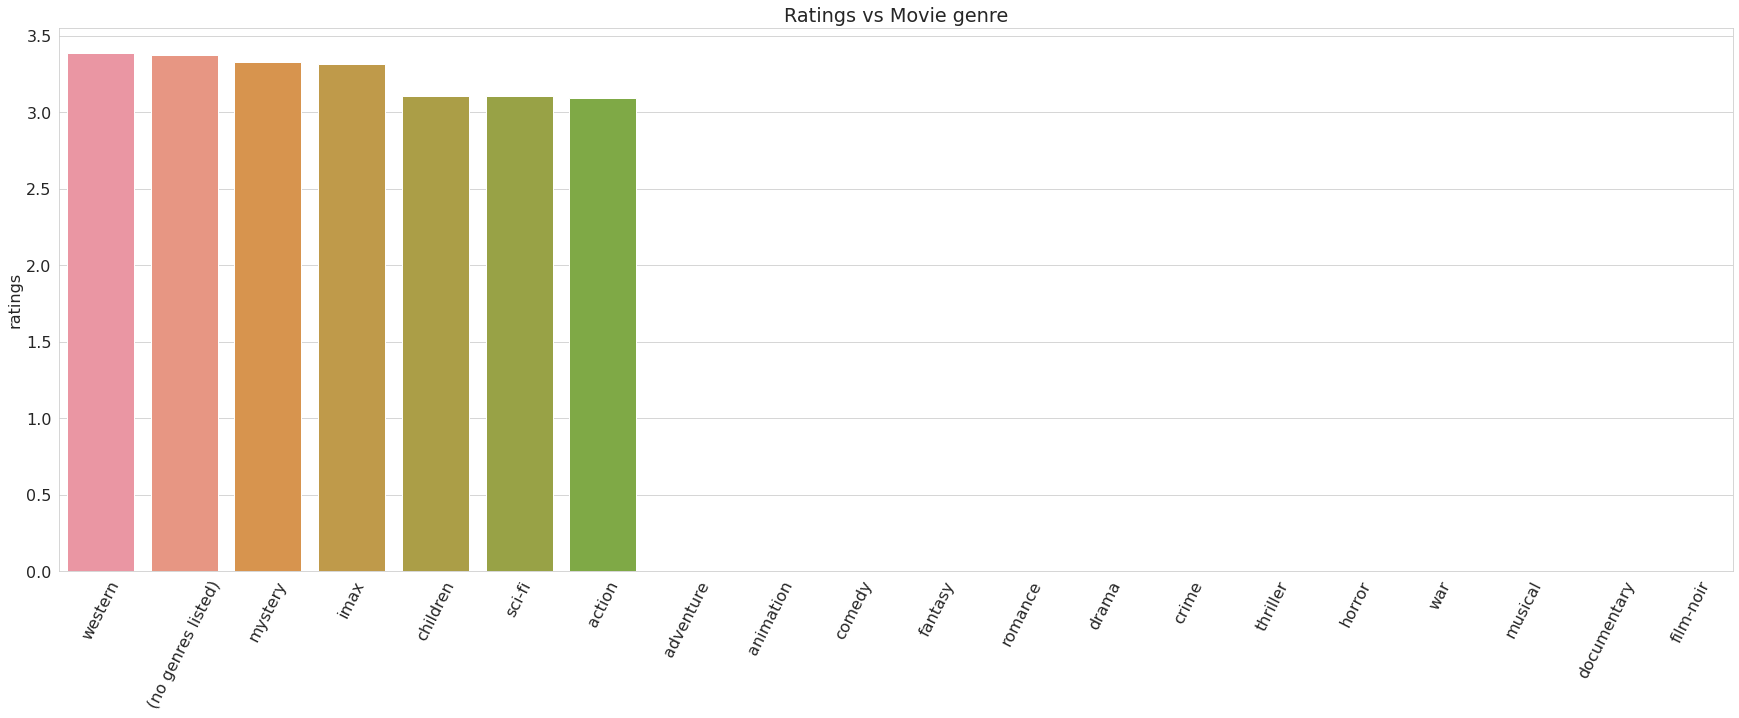

In [25]:
# printing the top 5 most ratied genres
plt.figure(figsize=(30,10))
sns.barplot(x=genre_ratings_sorted.sort_values('ratings', ascending=False).index, y=genre_ratings_sorted.sort_values('ratings', ascending=False).ratings)
plt.xticks(rotation=63)
plt.title('Ratings vs Movie genre')
plt.show()

From above we can see that the movies with the adventure genre have the highest average rating. Film-noil, comey seem to have a tie. The romance genre has the least ratings

### Total movies per genre

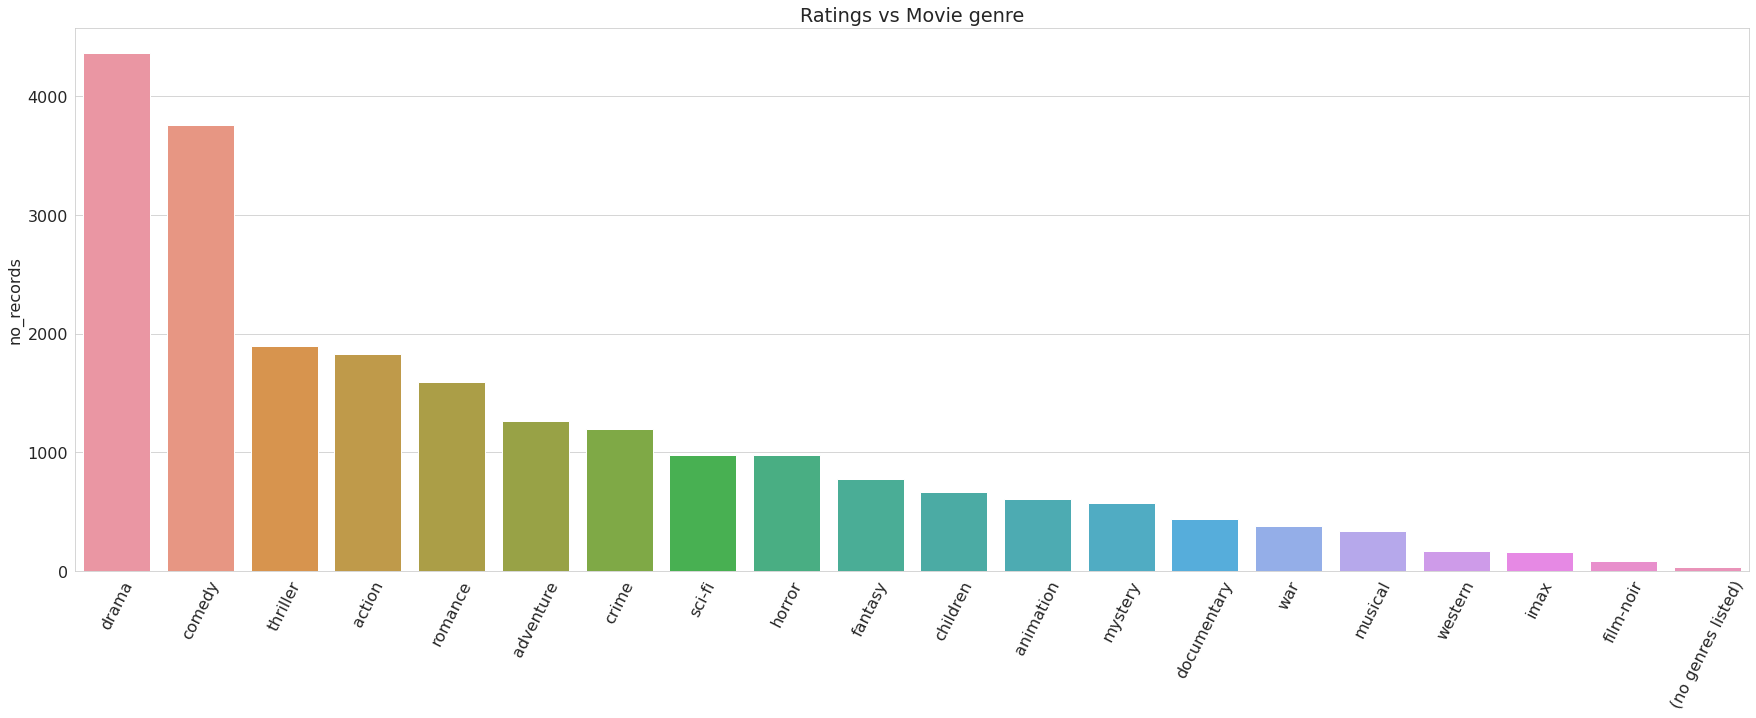

In [26]:
# printing the top 5 most ratied genres
plt.figure(figsize=(30,10))
sns.barplot(x=genre_ratings_sorted.sort_values('no_records', ascending=False).index, y=genre_ratings_sorted.sort_values('no_records', ascending=False).no_records)
plt.xticks(rotation=63)
plt.title('Ratings vs Movie genre')
plt.show()

In [27]:
# returning the movies_df_cleaned 
movies_df_cleaned.drop('year', axis=1, inplace=True)

### Making a master dataframe
We will merge different data frames to make a harmonised dataframe containing appropriate data. First lets have a look at the dataframes and how they can be merged together based on the criterions available.

In [69]:
# movies with no ratings receive 0 as their average rating
mean_rating = ratings_df_cleaned.groupby('movieId').rating.mean().rename('mean rating')
num_rating = ratings_df_cleaned.groupby('movieId').userId.count().rename('num rating')

movies_df_merged = pd.merge(movies_df_cleaned, mean_rating, how='left', on='movieId')
movies_df_merged = pd.merge(movies_df_cleaned, num_rating, how='left', on='movieId')

movies_df_merged

,movieId,title,genres,num rating
0,1,Toy Story (1995),"[adventure, animation, children, comedy, fantasy]",215.0
1,2,Jumanji (1995),"[adventure, children, fantasy]",110.0
2,3,Grumpier Old Men (1995),"[comedy, romance]",52.0
3,4,Waiting to Exhale (1995),"[comedy, drama, romance]",7.0
4,5,Father of the Bride Part II (1995),[comedy],49.0
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),"[action, animation, comedy, fantasy]",1.0
9738,193583,No Game No Life: Zero (2017),"[animation, comedy, fantasy]",1.0
9739,193585,Flint (2017),[drama],1.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),"[action, animation]",1.0


In [39]:
df = pd.merge(movies_df_cleaned, ratings_df_cleaned, on='movieId')
df.shape

(100836, 5)

In [41]:
df.head()

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),"[adventure, animation, children, comedy, fantasy]",1,4.0
1,1,Toy Story (1995),"[adventure, animation, children, comedy, fantasy]",5,4.0
2,1,Toy Story (1995),"[adventure, animation, children, comedy, fantasy]",7,4.5
3,1,Toy Story (1995),"[adventure, animation, children, comedy, fantasy]",15,2.5
4,1,Toy Story (1995),"[adventure, animation, children, comedy, fantasy]",17,4.5


In [40]:
df.isna().sum()

movieId    0
title      0
genres     0
userId     0
rating     0
dtype: int64